<a href="https://colab.research.google.com/github/pikachu13307/AICollegeEssay/blob/master/College_Essay_Hursh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [23]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [24]:
#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
#    -O /tmp/irish-lyrics-eof.txt

#from google.colab import files
#uploaded = files.upload()

!wget --no-check-certificate \
    https://raw.githubusercontent.com/pikachu13307/AICollegeEssay/master/essay10.txt \
    -O /tmp/essaynew.txt

# Mordern Essay - John Macy
#!wget --show-progress --continue -O /content/modernessay.txt https://www.gutenberg.org/files/38280/38280-0.txt

--2020-10-03 05:58:34--  https://raw.githubusercontent.com/pikachu13307/AICollegeEssay/master/essay10.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63220 (62K) [text/plain]
Saving to: ‘/tmp/essaynew.txt’

/tmp/essaynew.txt   100%[===================>]  61.74K  --.-KB/s    in 0.008s  

2020-10-03 05:58:34 (7.86 MB/s) - ‘/tmp/essaynew.txt’ saved [63220/63220]



In [25]:
tokenizer = Tokenizer()

#data = open('/tmp/irish-lyrics-eof.txt').read()
#data = open('/tmp/paradiselost.txt').read()
#data = open('/content/modernessay.txt').read()
data = open('/tmp/essaynew.txt').read()
#print(data)
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
print(total_words)


2685


In [26]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [27]:
print(tokenizer.word_index['in'])


8


In [28]:
#print(xs[6])

In [29]:
#print(ys[6])

In [30]:
#print(xs[5])
#print(ys[5])

In [31]:
#print(tokenizer.word_index)

In [32]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=30, verbose=1)
#print model.summary()
print(model)


Epoch 1/30
340/340 [==============================] - 19s 54ms/step - loss: 6.7754 - accuracy: 0.0518
Epoch 2/30
340/340 [==============================] - 18s 54ms/step - loss: 5.8237 - accuracy: 0.1011
Epoch 3/30
340/340 [==============================] - 18s 54ms/step - loss: 4.8517 - accuracy: 0.1672
Epoch 4/30
340/340 [==============================] - 18s 54ms/step - loss: 3.8116 - accuracy: 0.2529
Epoch 5/30
340/340 [==============================] - 18s 54ms/step - loss: 2.8026 - accuracy: 0.3796
Epoch 6/30
340/340 [==============================] - 18s 54ms/step - loss: 2.0305 - accuracy: 0.5062
Epoch 7/30
340/340 [==============================] - 18s 54ms/step - loss: 1.5238 - accuracy: 0.6222
Epoch 8/30
340/340 [==============================] - 18s 54ms/step - loss: 1.1922 - accuracy: 0.6972
Epoch 9/30
340/340 [==============================] - 18s 54ms/step - loss: 0.9589 - accuracy: 0.7517
Epoch 10/30
340/340 [==============================] - 18s 54ms/step - loss: 0.825

In [33]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

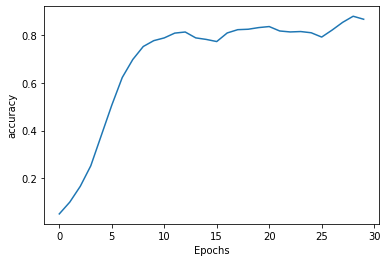

In [34]:
plot_graphs(history, 'accuracy')


In [35]:
#seed_text = "Beautiful blue sky"
#seed_text = "Life is a challange"
#seed_text = "Curiosity is awesome"
#seed_text = "I like computer science"
seed_text = "Life is fun"

next_words = 42
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print("---------------------")	
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
---------------------
Life is fun with as i want to be promising it just like the media has been distorting the image of being there a perceptual experience of pleasure as well as satisfaction an ideal a photojournalist i lived for the action shots the excited gestures
